In [2]:
import numpy as np
import sys
sys.path.append("..")
import pickle
import numpy as np
import pandas as pd
from tqdm import tqdm
import sys

from missing_process.block_rules import *
import json
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats


In [3]:
real_datalist = ["banknote","concrete_compression",
            "wine_quality_white","wine_quality_red",
            "california","climate_model_crashes",
            "connectionist_bench_sonar","qsar_biodegradation",
            "yeast","yacht_hydrodynamics"
            ]
#real_datalist = ["yacht_hydrodynamics"]

syn_datalist = ["syn1"]


missingtypelist = ["quantile","diffuse","logistic"]
#missingtypelist = ["diffuse"]

seed = 1
nfold = 5



In [4]:
def load_origin_data(missingtypelist,datalist_name):
    '''
    create density plot
    '''
    

    if datalist_name == "real":
        datalist = real_datalist
    elif datalist_name == "syn":
        datalist = syn_datalist

    for missingtype in missingtypelist:
        if missingtype == "logistic":
            missing_rule = load_json_file("missing_rate.json")
        elif missingtype == "diffuse":
            missing_rule = load_json_file("diffuse_ratio.json")
        elif missingtype == "quantile":
            missing_rule = load_json_file("quantile_full.json")

        # load data and its mask
        for dataname in datalist:
            directory_path = f"../datasets/{dataname}"    
            norm_values = np.load(f'{directory_path}/{dataname}_norm.npy')
            
            print(dataname)


            for rule_name in missing_rule:
                observed_masks = np.load(f'{directory_path}/{missingtype}/{rule_name}.npy')


            return norm_values,observed_masks

In [5]:
def RMSE(mask,complete,imputed):
    missing_data_points = mask == 0

    # Extracting the originally missing data from both complete and imputed data
    original_values = complete[missing_data_points]
    imputed_values = imputed[missing_data_points]

    # Calculating RMSE
    rmse = np.sqrt(np.mean((original_values - imputed_values) ** 2))

    return rmse


def MAE(mask,complete,imputed):
    missing_data_points = mask == 0

    # Extracting the originally missing data from both complete and imputed data
    original_values = complete[missing_data_points]
    imputed_values = imputed[missing_data_points]

    # Calculating RMSE
    mae = np.mean(np.abs(original_values - imputed_values))

    return mae

In [6]:
def load_impute_data(missingtype,model_name,rule_name,dataname,fold,seed = 1):

    train_impute = np.load(f'../impute/{missingtype}/{dataname}/{model_name}/{rule_name}_seed-{seed}_{fold}_train.npy')
    test_impute = np.load(f'../impute/{missingtype}/{dataname}/{model_name}/{rule_name}_seed-{seed}_{fold}_test.npy')
    return train_impute,test_impute

def load_train_test(index_file,norm_values,observed_masks):  

    train_index = index_file["train_index"]
    test_index = index_file["test_index"]

    train_values = norm_values[train_index,:]

    train_masks = observed_masks[train_index,:]

    test_values = norm_values[test_index,:]

    test_masks = observed_masks[test_index,:]

    return train_values,train_masks,test_values,test_masks

syn1
0.1
0.2
0.3
0.4
[       nan        nan        nan 0.615397   0.48535627 0.48137017
 0.45214341        nan]


e:\ANACONDA\envs\py3.10\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
e:\ANACONDA\envs\py3.10\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


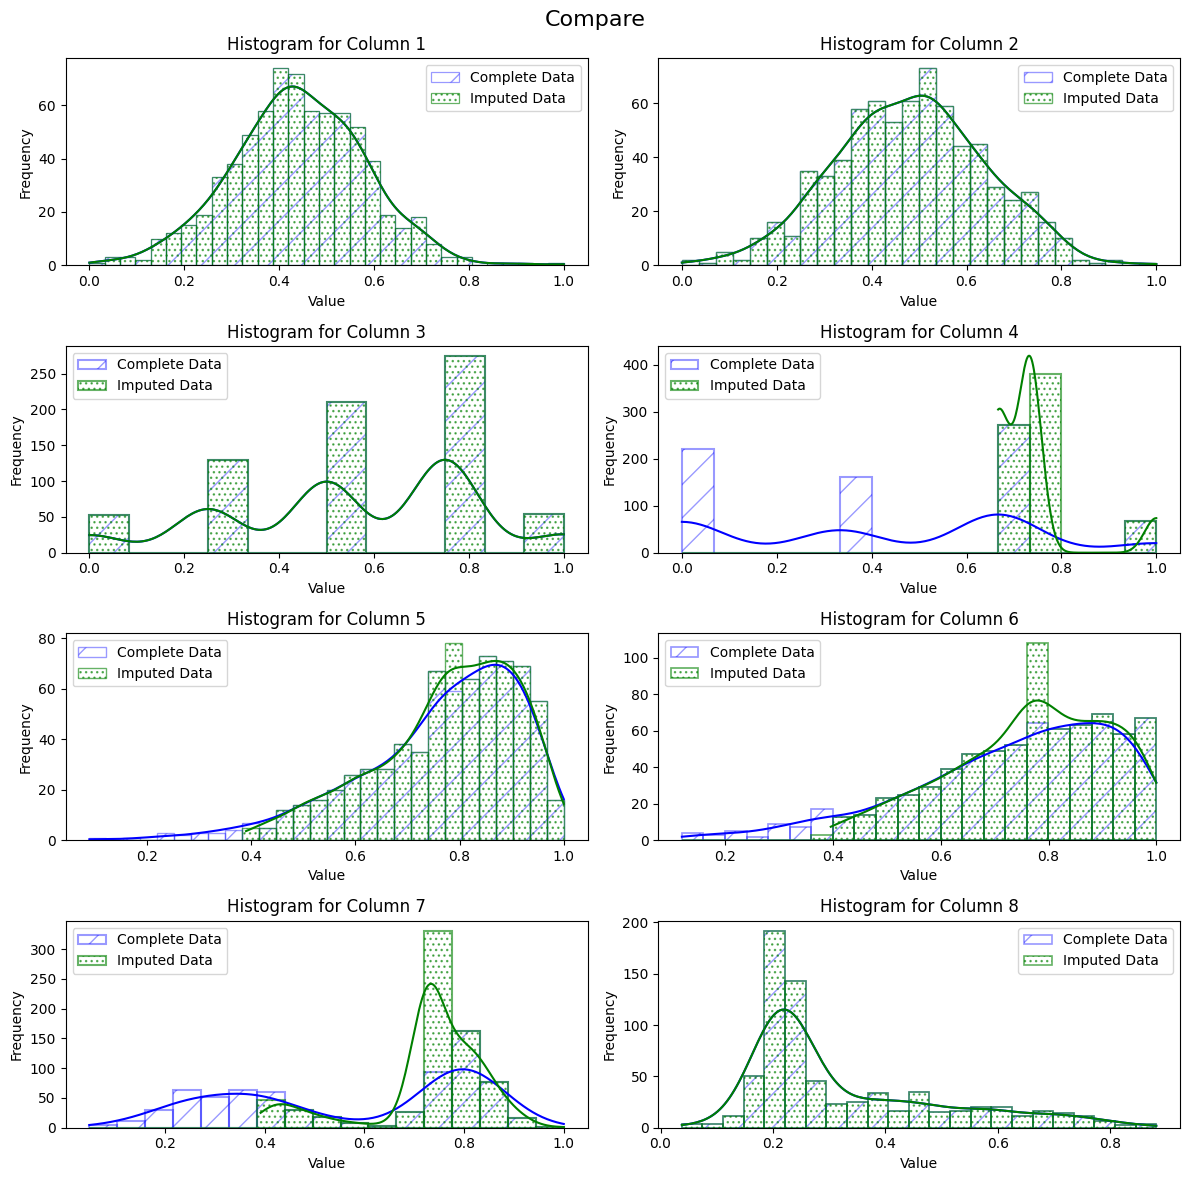

[[0.52361063 0.36866484 0.25       ... 0.91253949 0.20736699 0.25270661]
 [0.11072814 0.57709088 0.5        ... 0.70802999 0.84669853 0.24634095]
 [0.40937708 0.31628645 0.75       ... 0.43964621 0.74559362 0.20897833]
 ...
 [0.31677877 0.31074584 0.25       ... 0.66089435 0.30779629 0.22037699]
 [0.7016512  0.46641022 1.         ... 0.83603361 0.33848261 0.21865003]
 [0.44578617 0.42230245 0.5        ... 0.9056575  0.78126336 0.21991289]]
[[0.52361065 0.36866483 0.25       ... 0.9125395  0.7262744  0.25270662]
 [0.11072814 0.57709086 0.5        ... 0.70803    0.8466985  0.24634095]
 [0.4093771  0.31628644 0.75       ... 0.4396462  0.7455936  0.20897833]
 ...
 [0.31677878 0.31074584 0.25       ... 0.66089433 0.7262744  0.22037698]
 [0.7016512  0.46641022 1.         ... 0.8360336  0.7262744  0.21865003]
 [0.44578618 0.42230245 0.5        ... 0.90565753 0.78126335 0.21991289]]
0.5
0.6
0.7
[       nan 0.28424406 0.54006172 0.70202745        nan        nan
        nan 0.33668124]


e:\ANACONDA\envs\py3.10\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
e:\ANACONDA\envs\py3.10\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


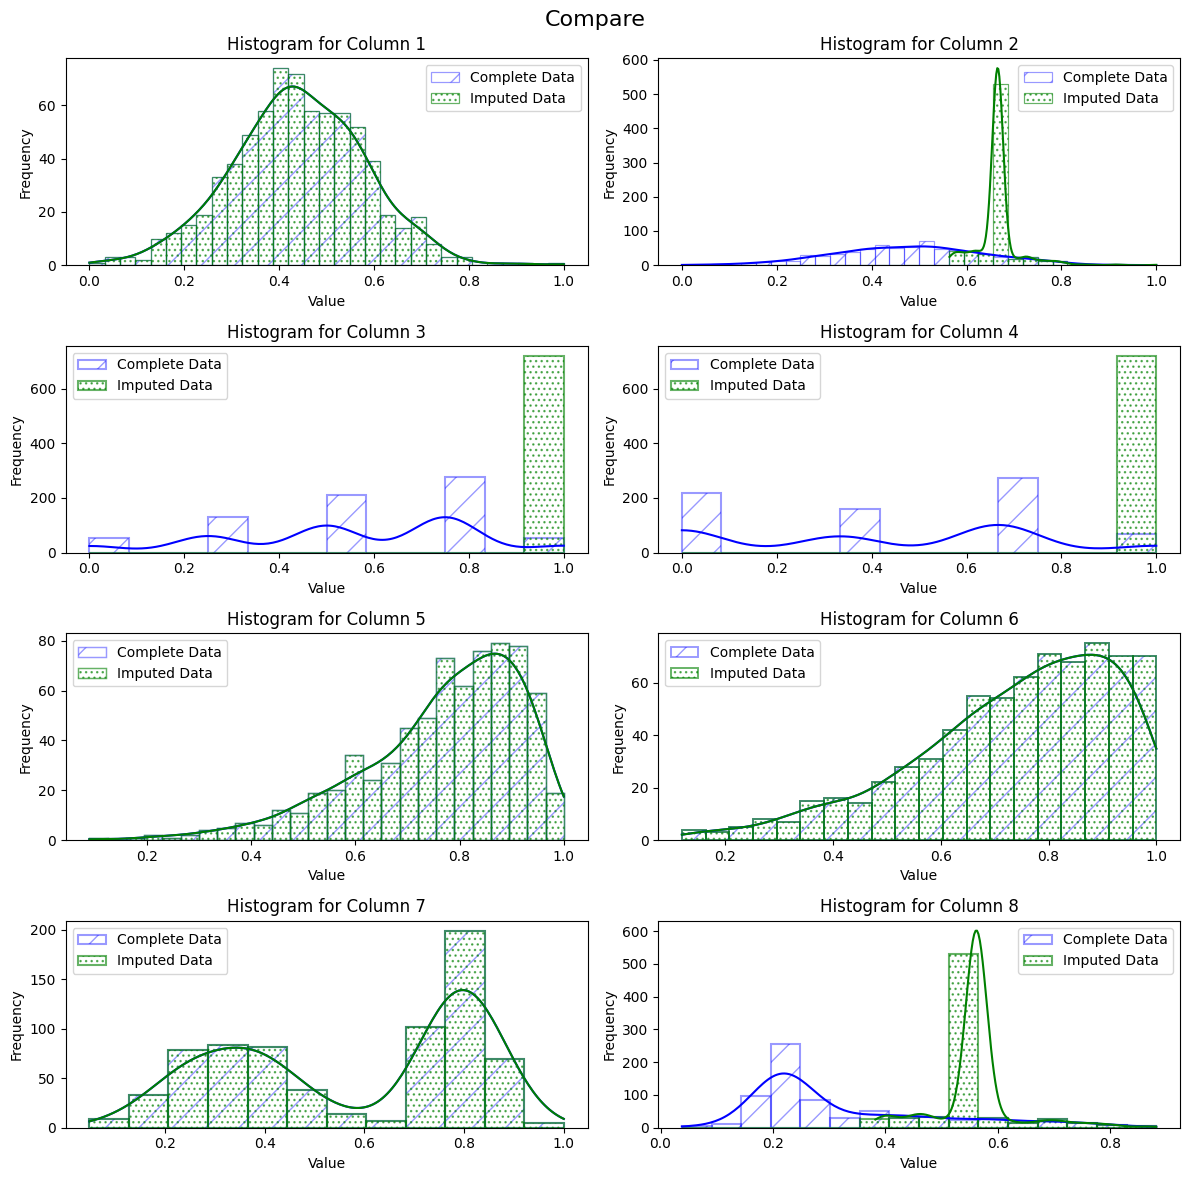

[[0.52361063 0.36866484 0.25       ... 0.91253949 0.20736699 0.25270661]
 [0.11072814 0.57709088 0.5        ... 0.70802999 0.84669853 0.24634095]
 [0.40937708 0.31628645 0.75       ... 0.43964621 0.74559362 0.20897833]
 ...
 [0.31677877 0.31074584 0.25       ... 0.66089435 0.30779629 0.22037699]
 [0.7016512  0.46641022 1.         ... 0.83603361 0.33848261 0.21865003]
 [0.44578617 0.42230245 0.5        ... 0.9056575  0.78126336 0.21991289]]
[[0.52361065 0.665674   1.         ... 0.9125395  0.20736699 0.5616751 ]
 [0.11072814 0.57709086 1.         ... 0.70803    0.8466985  0.5616751 ]
 [0.4093771  0.665674   1.         ... 0.4396462  0.7455936  0.5616751 ]
 ...
 [0.31677878 0.665674   1.         ... 0.66089433 0.3077963  0.5616751 ]
 [0.7016512  0.665674   1.         ... 0.8360336  0.33848262 0.5616751 ]
 [0.44578618 0.665674   1.         ... 0.90565753 0.78126335 0.5616751 ]]
0.8


In [13]:
#datalist = real_datalist

datalist = syn_datalist
missingtypelist = ["diffuse"]
model_name = "mean"


for missingtype in missingtypelist:
    if missingtype == "logistic":
        missing_rule = load_json_file("missing_rate.json")
    elif missingtype == "diffuse":
        missing_rule = load_json_file("diffuse_ratio.json")
    elif missingtype == "quantile":
        missing_rule = load_json_file("quantile_full.json")

    # load data and its mask
    for dataname in datalist:
        directory_path = f"../datasets/{dataname}"    
        norm_values = np.load(f'{directory_path}/{dataname}_norm.npy')
        f = open(f'{directory_path}/split_index_cv_seed-{seed}_nfold-{nfold}.json')
        index_file = json.load(f)
        print(dataname)

        train_rmse_mean = []
        train_rmse_std = []
        train_mae_mean = []
        train_mae_std = []

        
        test_rmse_mean = []
        test_rmse_std = []
        test_mae_mean = []
        test_mae_std = []


        for rule_name in missing_rule:
            print(rule_name)
            observed_masks = np.load(f'{directory_path}/{missingtype}/{rule_name}.npy')
            train_rmse_list = []
            train_mae_list = []
            test_rmse_list = []
            test_mae_list = []
            for fold in index_file:
                index = index_file[fold]
                train_values,train_masks,test_values,test_masks = load_train_test(index,norm_values,observed_masks)
                impute_train,impute_test  = load_impute_data(missingtype,model_name,rule_name,dataname,fold)

                train_rmse = RMSE(train_masks,train_values,impute_train)
                train_mae = MAE(train_masks,train_values,impute_train)

                if train_rmse > 0.5:
                    print(RMSE_columnwise(train_masks,train_values,impute_train))
                    make_plot(train_values,impute_train,title = "Compare")
                    #make_plot(impute_test,test_masks,title = "Impute")
                    print(train_values)
                    print(impute_train)

                    break
            


                test_rmse = RMSE(test_masks,test_values,impute_test)
                test_mae = MAE(test_masks,test_values,impute_test)

                train_rmse_list.append(train_rmse)
                train_mae_list.append(train_mae)
                test_rmse_list.append(test_rmse)
                test_mae_list.append(test_mae)
            
        break
            # print(train_rmse_list)
            # print(np.mean(train_rmse_list))
            # print(np.std(train_rmse_list))

            # print(np.mean(test_rmse_list))
            # print(np.std(test_rmse_list))
            # print("===")
            # train_rmse_mean.append(np.mean(train_rmse_list))
            # train_rmse_std.append(np.std(train_rmse_list))

            # if np.mean(train_rmse_list) > 0.5:
            #     print(RMSE_columnwise(train_masks,train_values,impute_train))
            #     make_plot(train_values,impute_train,title = "Complete")
                #make_plot(impute_test,test_masks,title = "Impute")
                #print(train_values)
                # print(np.max(train_values,axis=0))
                # print(np.min(train_values,axis=0))
                #print()
                # print(impute_train)
                # print(np.max(impute_train,axis=0))
                # print(np.min(impute_train,axis=0))
                # print(train_masks)
 
            


    #         train_mae_mean.append(np.mean(train_mae_list))
    #         train_mae_std.append(np.std(train_mae_list))

    #         test_rmse_mean.append(np.mean(test_rmse_list))
    #         test_rmse_std.append(np.std(test_rmse_list))

    #         test_mae_mean.append(np.mean(test_mae_list))
    #         test_mae_std.append(np.std(test_mae_list))


    #     df = pd.DataFrame({
    #     "train_rmse_mean": train_rmse_mean,
    #     "train_rmse_std":train_rmse_std,

    #     "train_mae_mean": train_mae_mean,
    #     "train_mae_std": train_mae_std,

    #     "test_rmse_mean": test_rmse_mean,
    #     "test_rmse_std": test_rmse_std,

    #     "test_mae_mean": test_mae_mean,
    #     "test_mae_std": test_mae_std
    # },index = [rule_name for rule_name in missing_rule])
        
    #     path = f"../results/{missingtype}/{dataname}/{model_name}"
    #     if not os.path.exists(path):
    #         # If the path does not exist, create it
    #         os.makedirs(path)
        
    #     df.to_csv(f'{path}/{missingtype}_RMSE.csv')
            
        


In [9]:
def RMSE_columnwise(mask, complete, imputed):


    # Initializing an array to store RMSE for each column
    rmse_per_column = np.zeros(complete.shape[1])

    # Iterate over each column
    for i in range(complete.shape[1]):
        missing_data_points = mask[:, i] == 0
        # Extracting the originally missing data from both complete and imputed data
        original_values = complete[missing_data_points, i]
        imputed_values = imputed[missing_data_points, i]

        # Calculating RMSE for this column
        rmse_per_column[i] = np.sqrt(np.mean((original_values - imputed_values) ** 2))

    return rmse_per_column

In [12]:
def make_plot(norm_value,mask, title = None):
        # Create a 4x2 grid of subplots
    fig, axes = plt.subplots(4, 2, figsize=(12, 12))
    axes = axes.ravel()  # Flatten the 4x2 grid for easy iteration
    masked_value = mask

    for i in range(norm_value.shape[1]):
        norm_column = norm_value[:, i]
        mask_column = masked_value[:, i]

        bins = np.histogram_bin_edges([norm_column, mask_column], bins='auto')
        #data_column2 = array_list[1][i]
        # Histogram
        #axes[i].hist(data_column, bins=30, alpha=0.7, edgecolor='black',kde = True)
        sns.histplot(data=norm_column, bins=bins, color='blue',alpha = 0.4, ax=axes[i], kde=True, label='Complete Data',
                     hatch="/", 
                     fill=False
                     )
        sns.histplot(data=mask_column, bins=bins, color='green',alpha = 0.6, ax=axes[i], kde=True, label='Imputed Data',
                     hatch='...', 
                     fill=False
                     )
        axes[i].set_xlabel('Value')
        axes[i].set_ylabel('Frequency')
        axes[i].set_title(f'Histogram for Column {i+1}')
        axes[i].legend()

    if title is not None:
        fig.suptitle(title, fontsize=16)
        # Adjust the layout
    plt.tight_layout()
    # plt.savefig(f"../plot/{title}.png")
    plt.show()

In [117]:
mask = np.array([[1,0],[1,0]])
complete = np.array([[1,0],[1,1]])
imputed = np.array([[ 1,1],[1,0]])

RMSE_columnwise(mask,complete,imputed)

array([nan,  1.])